# Predict turbine energy yield (TEY) using ambient variables as features.
---

## Data Description

- The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
- The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

The explanations of sensor measurements and their brief statistics are given below : 

| Variable | Abbrevation | Unit | Min | Max | Mean |
| :-: | :-: | :-: | :-: | :-: | :-: |
| Ambient temperature | AT | C | 6.23 | 37.10 | 17.71 |
| Ambient pressure | AP | mbar | 985.85 | 1036.56 | 1013.07 |
| Ambient humidity | AH | % | 24.08 | 100.20 | 77.87 |
| Air filter difference pressure | AFDP | mbar | 2.09 | 7.61 | 3.93 |
| Gas turbine exhaust pressure | GTEP | mbar | 17.70 | 40.72 | 25.56 |
| Turbine inlet temperature | TIT | C | 1000.85 | 1100.89 | 1081.43 |
| Turbine after temperature | TAT | C | 511.04 | 550.61 | 546.16 |
| Compressor discharge pressure | CDP | mbar | 9.85 | 15.16 | 12.06 |
| Carbon monoxide | CO | mg/m3 | 0.00 | 44.10 | 2.37 |
| Nitrogen oxides | NOx | mg/m3 | 25.90 | 119.91 | 65.29 |
| Turbine energy yield | TEY | MWH | 100.02 | 179.50 | 133.51 |

## Data Gathering

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading dataset
df = pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## Data Exploration

In [5]:
# Getting info on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


Nearly 15 Thousand samples, with 10 independent variables

In [6]:
# Checking for na values
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

No na values

In [7]:
# Checking for duplicates
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


No duplicates

In [8]:
# Getting description of each feature
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


We have vastly different scales

## Data Visualization

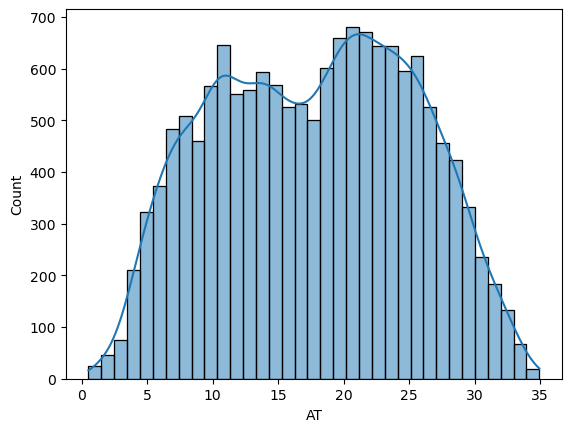

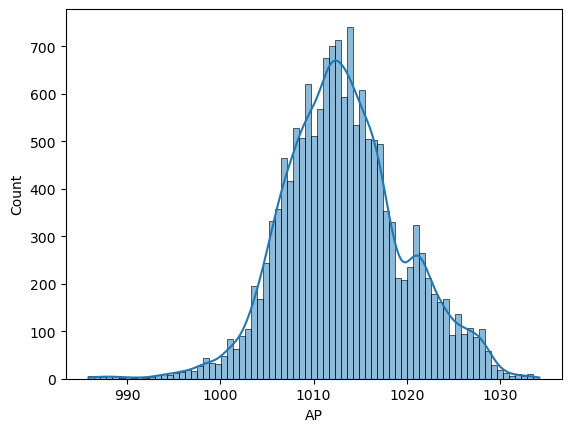

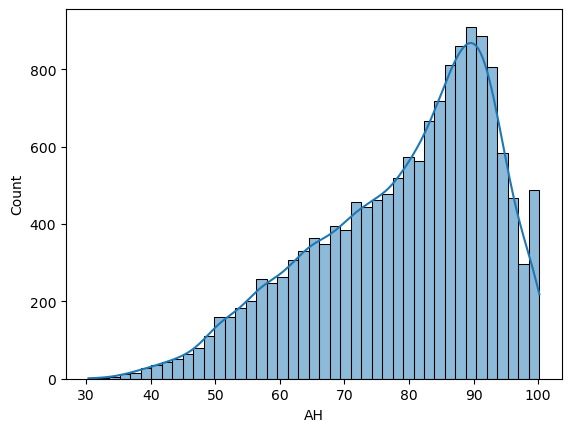

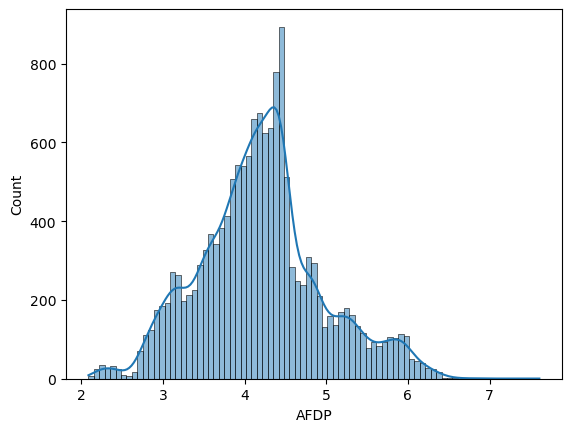

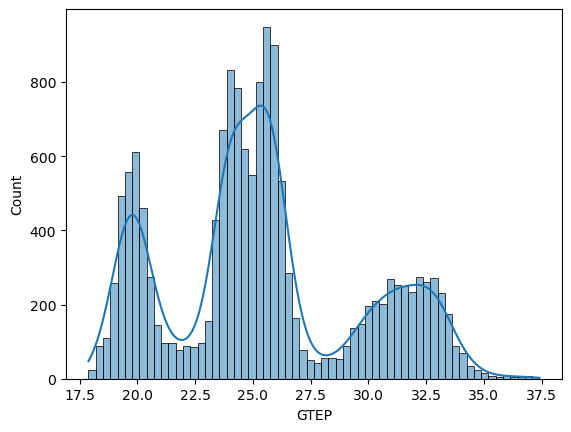

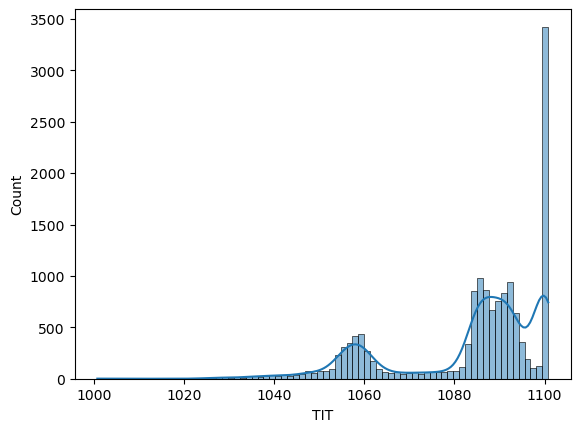

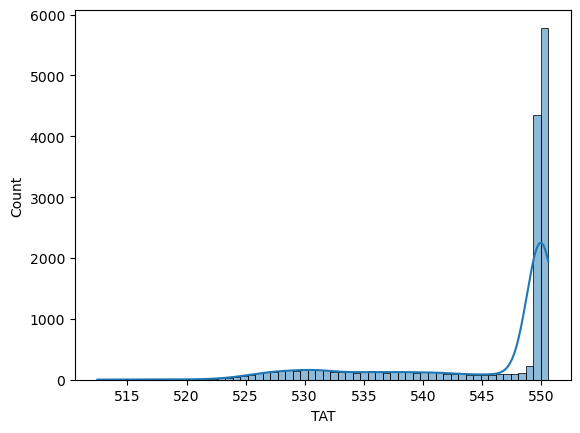

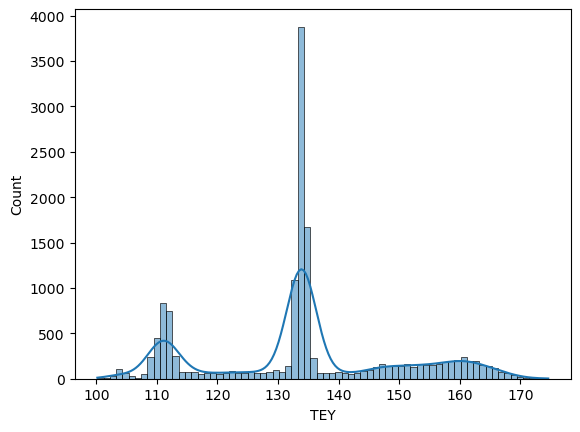

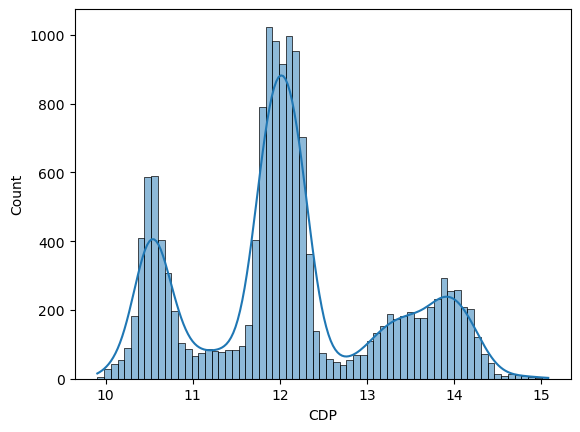

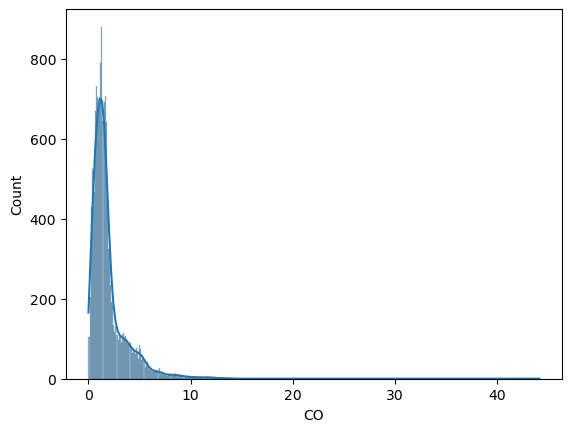

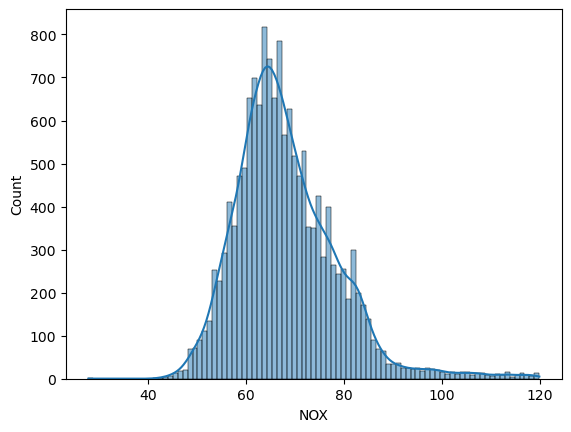

In [9]:
for col in df.columns:
    sns.histplot(df, x = col, kde = True)
    plt.show()

All features are not normally distributed

<Axes: >

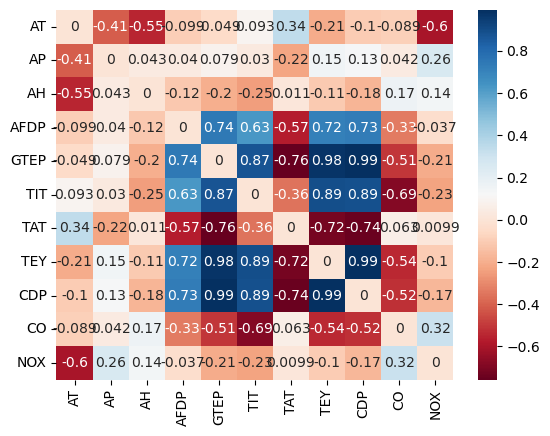

In [15]:
# Plotting correlation between features
cor_matrix = df.corr()
np.fill_diagonal(cor_matrix.values, 0)
sns.heatmap(cor_matrix, annot = True, cmap = 'RdBu')

Our target feature 'TEY' is highly positively correlated with 'CDP', 'GTEP', 'TIT', 'AFDP' respectively and highly negatively correlated with 'TAT', and 'CO'

## Feature Engineering

In [20]:
# Importing required libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardizing all features
df_std = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)
df_norm = pd.DataFrame(MinMaxScaler().fit_transform(df), columns = df.columns)

In [22]:
from sklearn.model_selection import train_test_split

# Separating independent and dependent features
X = df_std.drop(columns = 'TEY')
y = df_std.TEY

In [23]:
# Separating data into training and testing set
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)
print(f"Test set size : {test_y.shape[0]}")
print(f"Training set size : {train_y.shape[0]}")

Test set size : 3760
Training set size : 11279


## Hyperparameter Tuning

Let us start with a basic neural network

In [71]:
# Importing necessary libraries
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tensorflow as tf

In [72]:
# Checking if GPU is recognized by tensorflow
GPUs = tf.config.list_physical_devices('GPU')
print(f"Number of GPUs : {len(GPUs)}")

# Setting tensorflow to not allot entire GPU memory for operations, but rather use little of its memory as and when needed
tf.config.experimental.set_memory_growth(GPUs[0], True)

Number of GPUs : 1


RuntimeError: Physical devices cannot be modified after being initialized

In [28]:
import keras.backend as K

# Function for r squared as metric
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [62]:
# Function to display r_squared and mean squared error with increasing epoch for training and validation set, and printing r squared value for test set

def display_results():
    # Plotting the r squared for Training and Validation sets
    plt.plot(history.history['r_squared'])
    plt.plot(history.history['val_r_squared'])
    plt.title('Explained Variance')
    plt.ylabel('r squared')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting the loss for Training and Validation sets
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    # Prining R squared value for test set
    pred_y = model.predict(test_X)
    r2 = r2_score(test_y, pred_y.ravel())
    print("R-squared value:", r2)

In [63]:
# Creating a basic model with 2 hidden layers with relu activation function, and an output layer with linear activation function
model = Sequential([
    Dense(64, input_shape=(10,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  
])

# Using mean squared error for loss function, Adam optimizer with learning rate of 0.01
model.compile(loss='mse', optimizer=Adam(learning_rate = 0.01), metrics = [r_squared])

# Fitting the model
# Choosing 100 for batch size as it is nearly 1% of the training set size
history = model.fit(x = train_X, y = train_y, epochs=100, batch_size= 100, validation_split=0.2, verbose=0)

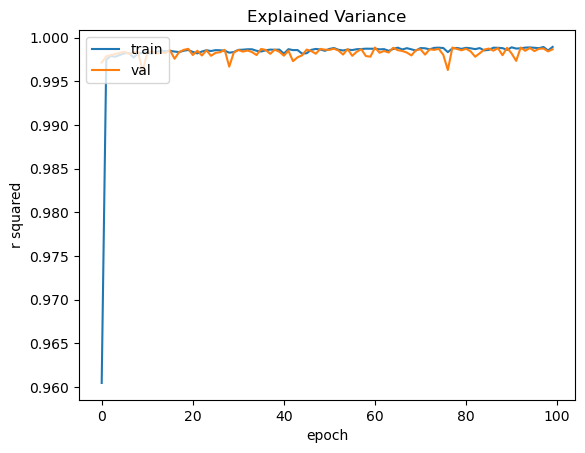

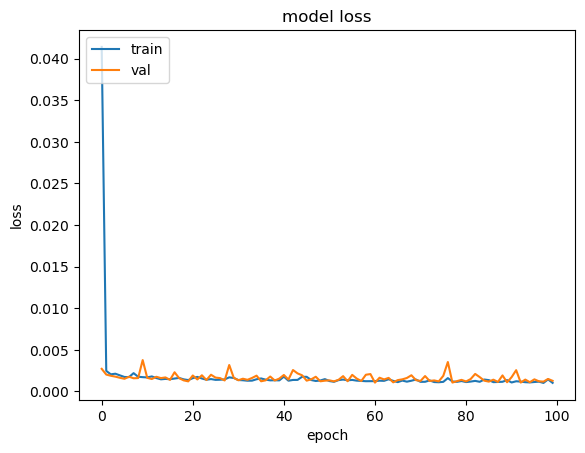

118/118 [==============================] - 1s 5ms/step
R-squared value: 0.9987288046743799


In [64]:
# Displaying results of the model
display_results()

With a basic model we get nearly a perfect score. We needed very few epochs to converge to minima

Lets try a simplified model. We'll have only 1 layer, with half the nodes of the input. We'll reduce the learning rate, and increase the batch size

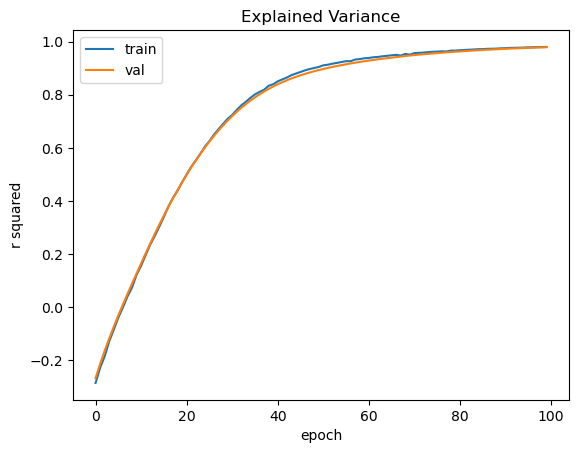

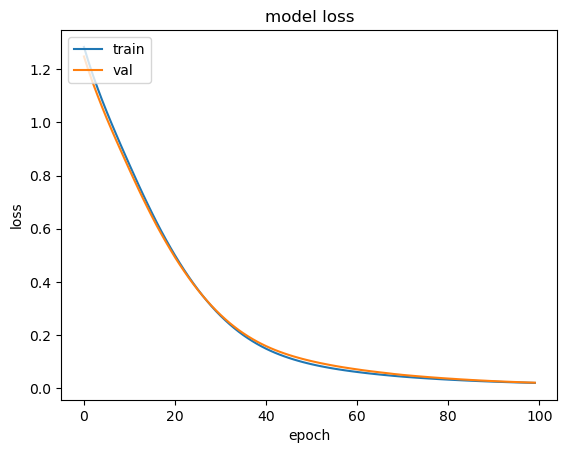

118/118 [==============================] - 1s 4ms/step
R-squared value: 0.9807525733405592


In [66]:
model = Sequential([
    Dense(5, input_shape=(10,), activation='relu'),
    Dense(1, activation='linear')  
])

model.compile(loss='mse', optimizer=Adam(learning_rate = 0.0001), metrics = [r_squared])

history = model.fit(x = train_X, y = train_y, epochs=100, batch_size= 200, validation_split=0.2, verbose=0)

display_results()

We have a slight dip in r squared score. Lets try a more complicated model. Lets increase the learning rate and reduce the batch size

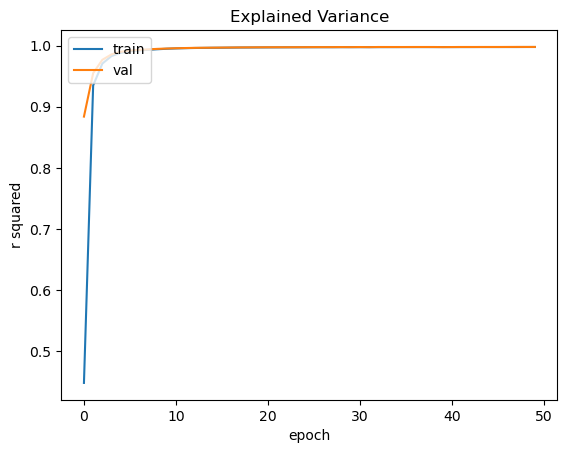

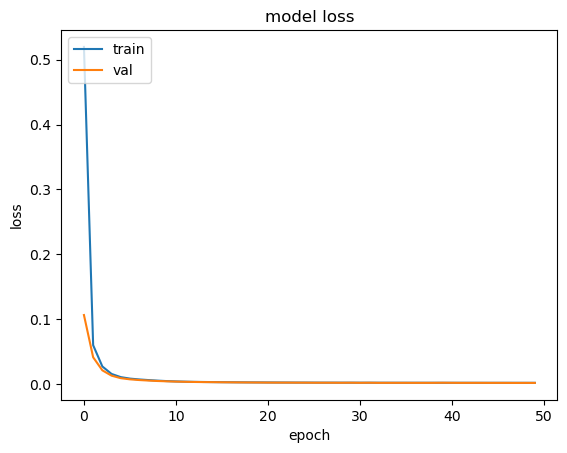

118/118 [==============================] - 0s 3ms/step
R-squared value: 0.9981860335340721


In [69]:
model = Sequential([
    Dense(5, input_shape=(10,), activation='relu'),
    Dense(1, activation='linear')  
])

model.compile(loss='mse', optimizer=Adam(learning_rate = 0.001), metrics = [r_squared])

history = model.fit(x = train_X, y = train_y, epochs=50, batch_size= 25, validation_split=0.2, verbose=0)

display_results()

We have nearly reached the r squared value of our original model. Lets try increasing the number of nodes in the hidden layer

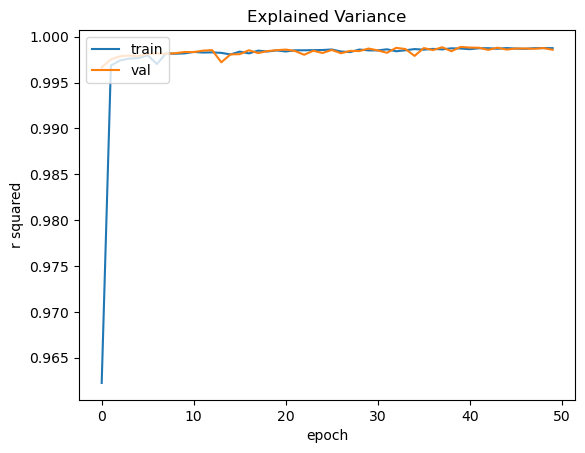

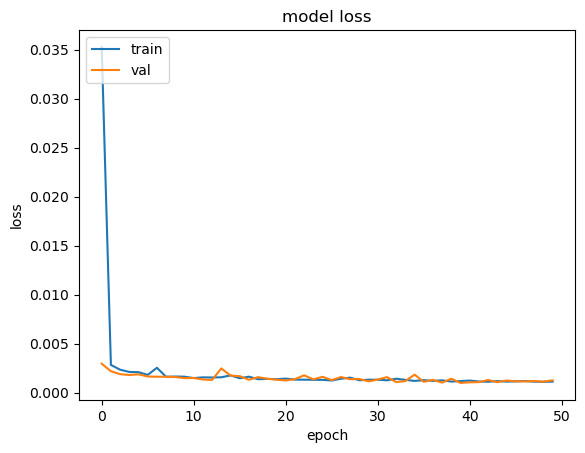

118/118 [==============================] - 0s 3ms/step
R-squared value: 0.99865789153717


In [73]:
model = Sequential([
    Dense(128, input_shape=(10,), activation='relu'),
    Dense(1, activation='linear')  
])

model.compile(loss='mse', optimizer=Adam(learning_rate = 0.001), metrics = [r_squared])

history = model.fit(x = train_X, y = train_y, epochs=50, batch_size= 25, validation_split=0.2, verbose=0)

display_results()

We got closer yet to the original score. Lets try adding another layer

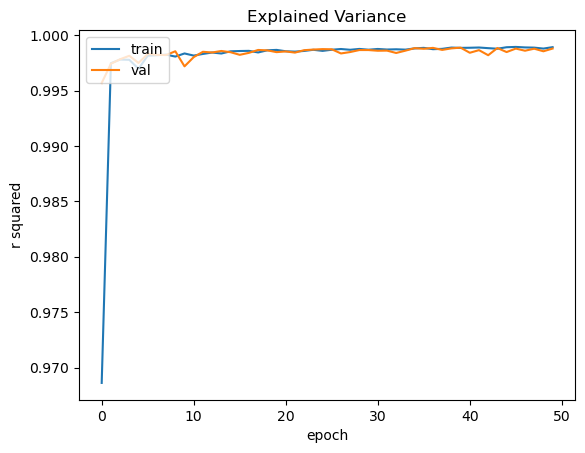

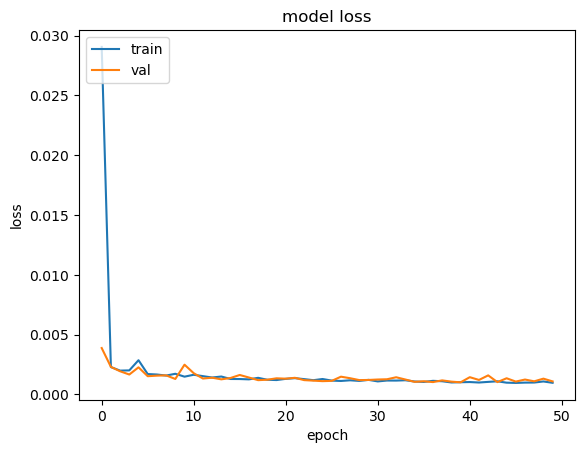

118/118 [==============================] - 0s 3ms/step
R-squared value: 0.9990479158231688


In [74]:
model = Sequential([
    Dense(128, input_shape=(10,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  
])

model.compile(loss='mse', optimizer=Adam(learning_rate = 0.001), metrics = [r_squared])

history = model.fit(x = train_X, y = train_y, epochs=50, batch_size= 25, validation_split=0.2, verbose=0)

display_results()

We beat our original score! We have a test score of 99.9% now. Lets see if adding another layer improve it. We will also reduce learning rate and batch_size to ensure we don't overfit to training data

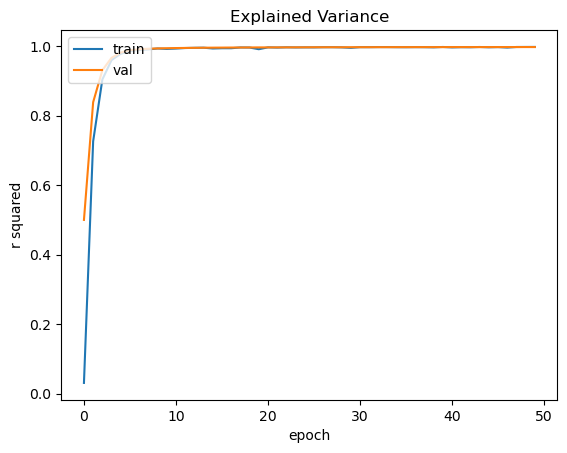

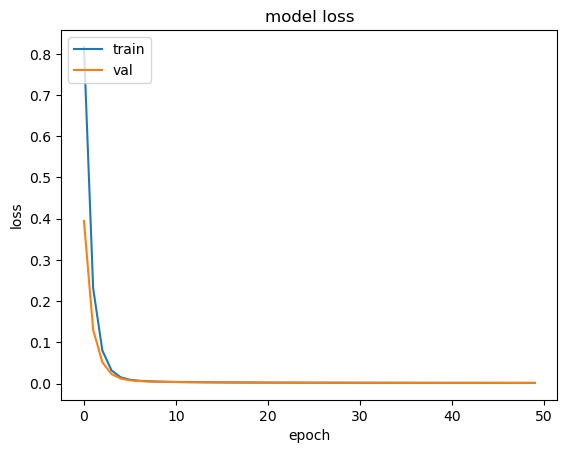

118/118 [==============================] - 0s 3ms/step
R-squared value: 0.9984471283002293


In [80]:
model = Sequential([
    Dense(128, input_shape=(10,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')  
])

model.compile(loss='mse', optimizer=Adam(learning_rate = 0.00001), metrics = [r_squared])

history = model.fit(x = train_X, y = train_y, epochs=50, batch_size= 10, validation_split=0.2, verbose=0)

display_results()

The score is did not improve. Lets try small changes to the model with the best score to see if we can improve it

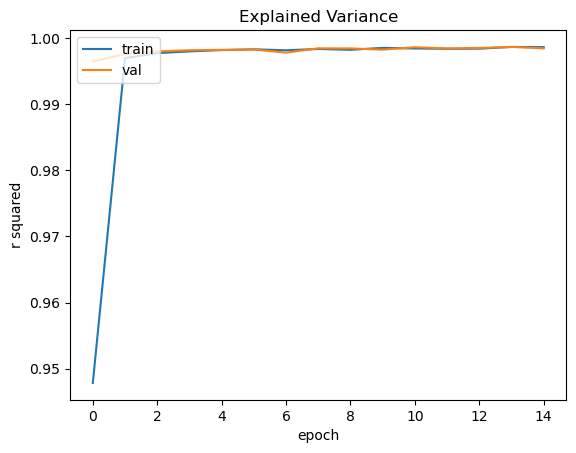

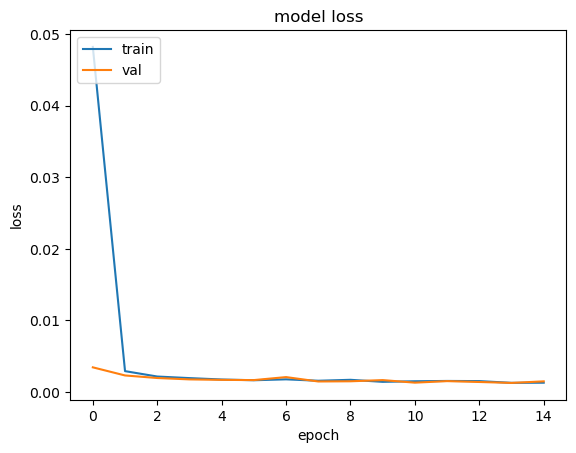

118/118 [==============================] - 0s 3ms/step
R-squared value: 0.9984596275082684


In [81]:
model = Sequential([
    Dense(128, input_shape=(10,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  
])

model.compile(loss='mse', optimizer=Adam(learning_rate = 0.001), metrics = [r_squared])

history = model.fit(x = train_X, y = train_y, epochs=15, batch_size= 50, validation_split=0.2, verbose=0)

display_results()

Increasing batch size reduced score. Lets try reducing batch size

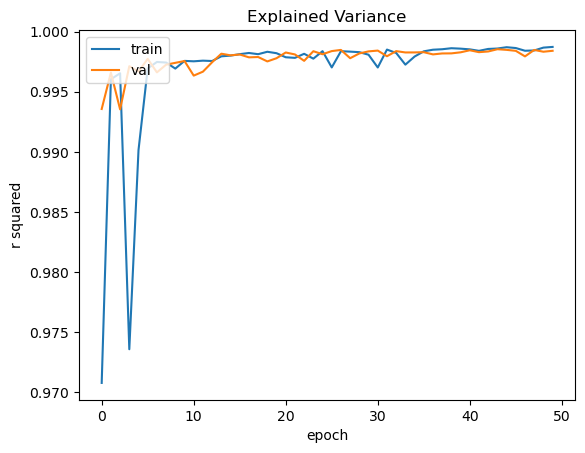

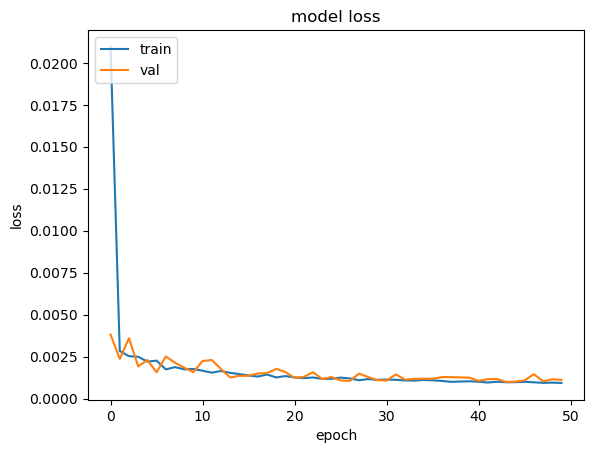

118/118 [==============================] - 0s 3ms/step
R-squared value: 0.9989002798689472


In [83]:
model = Sequential([
    Dense(128, input_shape=(10,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  
])

model.compile(loss='mse', optimizer=Adam(learning_rate = 0.001), metrics = [r_squared])

history = model.fit(x = train_X, y = train_y, epochs=50, batch_size= 10, validation_split=0.2, verbose=0)

display_results()

This slightly reduced the score as well

## Conclusion

- With a very basic model, we got a nearly perfect score on test set, by using mean squared error as the loss function
- We got the best score of 99.9% with 2 hidden layers of 128 and 32 nodes respectively with relu activation, learning rate of 0.001, batch size of 25, and 50 epochs
- 3 hidden layers reduced the score